
Grupo A
Média: 7.0
Mediana: 7.0
Desvio Padrão: 3.1622776601683795

Grupo B
Média: 6.0
Mediana: 6.0
Desvio Padrão: 3.1622776601683795

Teste Shapiro-Wilk:
Grupo A: ShapiroResult(statistic=np.float64(0.986762155211559), pvalue=np.float64(0.9671739349728582))
Grupo B: ShapiroResult(statistic=np.float64(0.986762155211559), pvalue=np.float64(0.9671739349728582))

Correlação de Pearson:
Coeficiente: 1.0
P-valor: 0.0


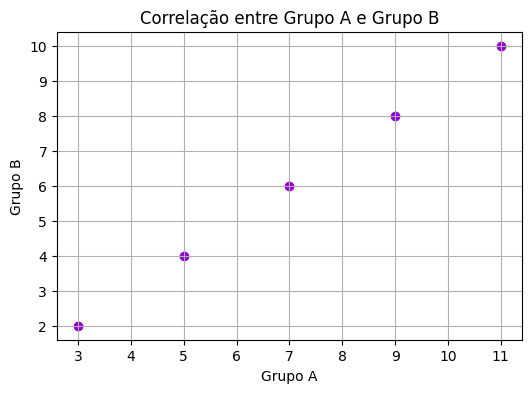

Arquivo vendas.xlsx criado.

Dados originais:
   Região  Mês  Vendas  Despesas
0  Norte  Jan  1500.0     300.0
1  Norte  Fev     NaN     250.0
2    Sul  Jan  2200.0       NaN
3    Sul  Fev  1800.0     400.0
4  Norte  Mar  2000.0     350.0

Agrupamento por Região e Mês:
   Região  Mês  Vendas  Despesas
0  Norte  Fev  1900.0     250.0
1  Norte  Jan  1500.0     300.0
2  Norte  Mar  2000.0     350.0
3    Sul  Fev  1800.0     400.0
4    Sul  Jan  2200.0     325.0

Hstack (Vendas + Despesas):
 [[1500.  300.]
 [1900.  250.]
 [2200.  325.]
 [1800.  400.]
 [2000.  350.]]

Sumário estatístico:
             Vendas    Despesas
count     5.000000    5.000000
mean   1880.000000  325.000000
std     258.843582   55.901699
min    1500.000000  250.000000
25%    1800.000000  300.000000
50%    1900.000000  325.000000
75%    2000.000000  350.000000
max    2200.000000  400.000000

Conclusões:
- A correlação entre os grupos A e B foi perfeita (r = 1), com significância estatística.
- O arquivo de vendas foi 

In [2]:
# 📊 Desafios com Dados – Estatística em Python
# Este notebook resolve os desafios obrigatório e eletivo 2 da disciplina de Data Science.
# Desafios com Dados – 2º Elemento Avaliativo
# Disciplina: Estatística Aplicada / Data Science
# Aluna: Morgana
# Linguagem: Python 3
# Este notebook contém:
# - Desafio Obrigatório: Análise de dados de vendas
# - Desafio Eletivo 2: Correlação entre dois grupos

# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# === DESAFIO ELETIVO 2 ===

# Dados dos grupos
grupoA = np.array([3, 5, 7, 9, 11])
grupoB = np.array([2, 4, 6, 8, 10])

# Estatísticas: média, mediana, desvio padrão
def resumo(grupo, nome):
    print(f"\n{nome}")
    print("Média:", np.mean(grupo))
    print("Mediana:", np.median(grupo))
    print("Desvio Padrão:", np.std(grupo, ddof=1))

resumo(grupoA, "Grupo A")
resumo(grupoB, "Grupo B")

# Teste de Shapiro-Wilk para verificar normalidade
print("\nTeste Shapiro-Wilk:")
print("Grupo A:", stats.shapiro(grupoA))
print("Grupo B:", stats.shapiro(grupoB))

# Correlação de Pearson (porque os dados são normais)
correlacao = stats.pearsonr(grupoA, grupoB)
print("\nCorrelação de Pearson:")
print("Coeficiente:", correlacao[0])
print("P-valor:", correlacao[1])

# Gráfico de dispersão
plt.figure(figsize=(6, 4))
plt.scatter(grupoA, grupoB, color='darkviolet')
plt.title("Correlação entre Grupo A e Grupo B")
plt.xlabel("Grupo A")
plt.ylabel("Grupo B")
plt.grid(True)
plt.show()


# === DESAFIO OBRIGATÓRIO ===

# Criar e salvar arquivo vendas.xlsx
df = pd.DataFrame({
    'Região': ['Norte', 'Norte', 'Sul', 'Sul', 'Norte'],
    'Mês': ['Jan', 'Fev', 'Jan', 'Fev', 'Mar'],
    'Vendas': [1500, np.nan, 2200, 1800, 2000],
    'Despesas': [300, 250, np.nan, 400, 350]
})

# Salvar em Excel
df.to_excel("vendas.xlsx", index=False)
print("Arquivo vendas.xlsx criado.")


# Carregar o arquivo
df = pd.read_excel("vendas.xlsx")
print("\nDados originais:\n", df)

# Substituir valores ausentes
df.loc[:, 'Vendas'] = df['Vendas'].fillna(df['Vendas'].median())
df.loc[:, 'Despesas'] = df['Despesas'].fillna(df['Despesas'].mean())

# Agrupar por Região e Mês
agrupado = df.groupby(['Região', 'Mês']).agg({
    'Vendas': 'sum',
    'Despesas': 'mean'
}).reset_index()
print("\nAgrupamento por Região e Mês:\n", agrupado)

# Combinar colunas Vendas e Despesas
hstack = np.hstack((df[['Vendas']], df[['Despesas']]))
print("\nHstack (Vendas + Despesas):\n", hstack)

# Sumário estatístico
print("\nSumário estatístico:\n", df.describe())


# Conclusão
print("""
Conclusões:
- A correlação entre os grupos A e B foi perfeita (r = 1), com significância estatística.
- O arquivo de vendas foi tratado com substituição de valores ausentes e agrupamento por região/mês.
- Os dados numéricos foram analisados com estatísticas descritivas e estrutura combinada.
""")


